# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
cols=['id','Clump','UniCellSize','UniCellShape','MargAdhe','EpiCellSize','BareNuclei','BlandChromatin','NormalNucleoli','Mitoses','Class']
can_df=pd.read_csv('breast-cancer-wisconsin.data.txt',header=None)
can_df.head()
##can_df.index=['id','radius','texture','perimeter','area','smoothness','compactness','concavity','concave-points','symmetry','fractal-dimension']

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
0     699 non-null int64
1     699 non-null int64
2     699 non-null int64
3     699 non-null int64
4     699 non-null int64
5     699 non-null int64
6     699 non-null object
7     699 non-null int64
8     699 non-null int64
9     699 non-null int64
10    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
can_df.columns=cols

In [5]:
can_df.head(5)

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [24]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null object
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null object
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
can_df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [12]:
can_df[can_df['BareNuclei']=='?']

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [30]:
can_df=can_df.replace('?',np.nan)
can_df.head(10)

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [14]:
median = can_df[np.logical_not(can_df['BareNuclei'].isna())]['BareNuclei'].median()
median

1.0

In [15]:
can_df.fillna(median,inplace=True)

In [16]:
can_df[can_df['BareNuclei']=='?']

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class


In [27]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null object
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [28]:
can_df['BareNuclei']=can_df['BareNuclei'].astype(int)

In [29]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                699 non-null int64
Clump             699 non-null int64
UniCellSize       699 non-null int64
UniCellShape      699 non-null int64
MargAdhe          699 non-null int64
EpiCellSize       699 non-null int64
BareNuclei        699 non-null int32
BlandChromatin    699 non-null int64
NormalNucleoli    699 non-null int64
Mitoses           699 non-null int64
Class             699 non-null int64
dtypes: int32(1), int64(10)
memory usage: 57.4 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [17]:
# Check for correlation of variable

In [18]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [19]:
#Let us check for pair plots

In [20]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

In [31]:
can_df.corr()

,id,Clump,UniCellSize,UniCellShape,MargAdhe,EpiCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
id,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
Clump,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
UniCellSize,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
UniCellShape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
MargAdhe,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
EpiCellSize,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
BareNuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
BlandChromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
NormalNucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


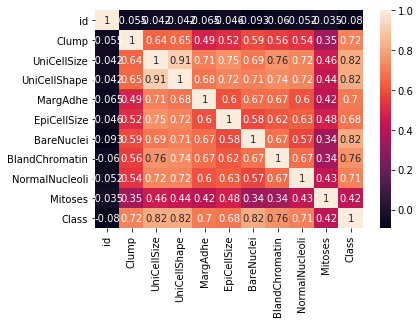

In [32]:
sns.heatmap(can_df.corr(),annot=True)

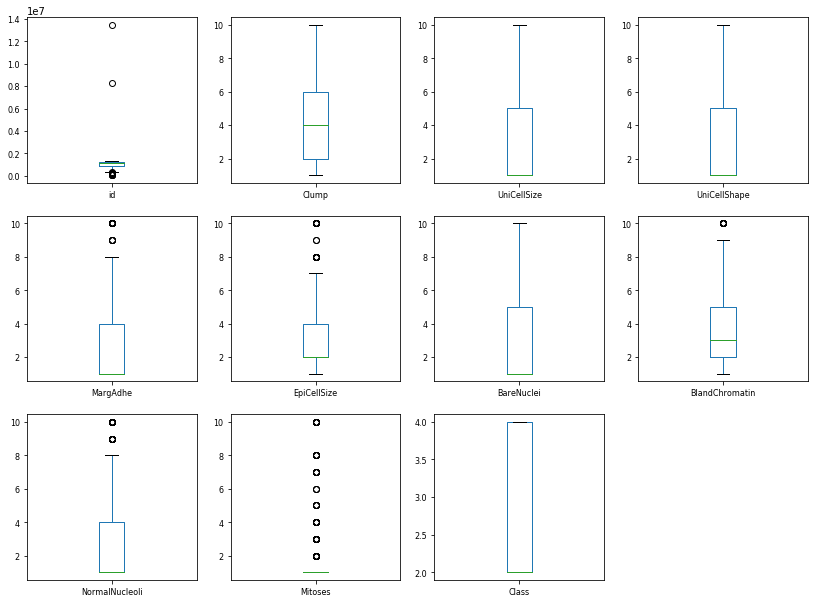

In [34]:
can_df.plot(kind='box', subplots=True, layout=(4,4), fontsize=8, figsize=(14,14))
plt.show()

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [21]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [22]:
# PCA
# Step 1 - Create covariance matrix


# Q7 Identify eigen values and eigen vector

In [23]:
# Step 2- Get eigen values and eigen vector

# Q8 Find variance and cumulative variance by each eigen vector

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

# Q10 Find correlation between components and features

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

# Q22 Change the column indices from 0 to 99

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.